<a href="https://colab.research.google.com/github/lokloc/bigdata_project/blob/main/201844003_3_A%EB%B0%98_%EA%B6%8C%EC%A3%BC%ED%95%9C%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터 처리 프로젝트**

by 권주한

--------------------------------------------------------------------------------

#  한국 유튜브 영상 데이터 분석하기

- **캐글 install**


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- **구글 드라이브에 있는 Kaggle API를 가져오기 위한 설정**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

- **캐글에 있는 youtube-trending-video 데이터셋 가져오기**

In [ ]:
!kaggle datasets download -d rsrishav/youtube-trending-video-dataset

 99% 1.05G/1.07G [00:09<00:00, 107MB/s]
100% 1.07G/1.07G [00:09<00:00, 119MB/s]


In [ ]:
!unzip /content/KR_youtube_trending_data.csv.zip

Archive:  /content/KR_youtube_trending_data.csv.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/KR_youtube_trending_data.csv.zip or
        /content/KR_youtube_trending_data.csv.zip.zip, and cannot find /content/KR_youtube_trending_data.csv.zip.ZIP, period.


In [ ]:
! unzip youtube-trending-video-dataset.zip

Archive:  youtube-trending-video-dataset.zip
  inflating: BR_category_id.json     
  inflating: BR_youtube_trending_data.csv  
  inflating: CA_category_id.json     
  inflating: CA_youtube_trending_data.csv  
  inflating: DE_category_id.json     
  inflating: DE_youtube_trending_data.csv  
  inflating: FR_category_id.json     
  inflating: FR_youtube_trending_data.csv  
  inflating: GB_category_id.json     
  inflating: GB_youtube_trending_data.csv  
  inflating: IN_category_id.json     
  inflating: IN_youtube_trending_data.csv  
  inflating: JP_category_id.json     
  inflating: JP_youtube_trending_data.csv  
  inflating: KR_category_id.json     
replace KR_youtube_trending_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: KR_youtube_trending_data.csv  
  inflating: MX_category_id.json     
  inflating: MX_youtube_trending_data.csv  
  inflating: RU_category_id.json     
  inflating: RU_youtube_trending_data.csv  
  inflating: US_category_id.json     
  inflating: US_you

# ***데이터의 기초 정보 살펴보기***

- **데이터셋에 대한 차원적 이해**
- **각 열의 데이터 유형 요약**
- **데이터셋의 통계적 요약/숫자 열 설명**
- **숫자가 아닌 열에 대한 설명**

----------------------------------------------------------
*위 서브 목표를 달성하기 위해*

In [122]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import json
from matplotlib import cm
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.font_manager as fm
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant





df = pd.read_csv('/content/KR_youtube_trending_data.csv')

1.  **데이터셋의 첫 5줄을 출력해주면서 해당 데이터셋에 대한 감 잡기**

In [96]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


2. **컬럼과 들어있는 관련 데이터 유형을 살펴봅시다**

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167954 entries, 0 to 167953
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           167954 non-null  object
 1   title              167954 non-null  object
 2   publishedAt        167954 non-null  object
 3   channelId          167954 non-null  object
 4   channelTitle       167954 non-null  object
 5   categoryId         167954 non-null  int64 
 6   trending_date      167954 non-null  object
 7   tags               167954 non-null  object
 8   view_count         167954 non-null  int64 
 9   likes              167954 non-null  int64 
 10  dislikes           167954 non-null  int64 
 11  comment_count      167954 non-null  int64 
 12  thumbnail_link     167954 non-null  object
 13  comments_disabled  167954 non-null  bool  
 14  ratings_disabled   167954 non-null  bool  
 15  description        164038 non-null  object
dtypes: bool(2), int64(5)

3. **열의 통계 요약**

In [98]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,167954.000000,1.679540e+05,1.679540e+05,167954.000000,1.679540e+05
mean,20.434875,1.719019e+06,7.585814e+04,712.603624,8.781213e+03
std,6.170512,6.610227e+06,4.323286e+05,8744.548550,1.096421e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,19.000000,3.476110e+05,5.908250e+03,0.000000,5.430000e+02
50%,23.000000,6.719070e+05,1.180100e+04,68.000000,1.197000e+03
75%,24.000000,1.345630e+06,2.717975e+04,278.000000,2.788000e+03
max,29.000000,2.963142e+08,1.646425e+07,879358.000000,6.939302e+06


4. **데이터셋의 영상 데이터 개수**

In [99]:
df['video_id'].count()

167954

--------------------------------------------------------------

# **데이터 전처리**

**1. 불필요한 데이터 삭제**

In [100]:
del_cols = [
    'thumbnail_link','comments_disabled','ratings_disabled' , 'description']
df = df.drop(del_cols, axis=1)

**2. 중복 데이터 갯수 확인 (152개)**

In [101]:
dup = df.duplicated()
dup.value_counts()

False    167802
True        152
dtype: int64

**3.중복 데이터 정리**

In [102]:
df = df.drop_duplicates(keep='first')

**4. category_id열이 명목 속성, 즉 특정 개체에 코드로 부여된 숫자입니다. 개체를 식별하는 데만 사용됩니다. 숫자로 조작 할 수 없기 때문에 카테고리에 매핑하기 전에 데이터 유형을 할당.**

In [103]:
df['categoryId'] = df['categoryId'].astype(str)

***그전에, 카테고리를 포함하고 있는 json파일를 먼저 읽어들이기 해줍시다.***

In [104]:
categories_df = pd.read_json('/content/KR_category_id.json')

***category_ids로 키를 포함하고 범주로 값을 포함하는 딕셔너리를 만들어줍니다.***

In [105]:
id_to_category = {}
for category in categories_df['items']:
  id_to_category[category['id']] = category['snippet']['title']

In [106]:
df.insert(4, 'category', df['categoryId'].map(id_to_category))

--------------------------------------------------------------------------------

# **의미 있는 데이터들에 대한 시각화**

- **편의를 위해 두개의 함수를 작성해줍니다.**

**colum_stats에 의해 지정된 통계에 대해 가장 많은 수가 있는 동영상/채널/카테고리와 댓글 수, 좋아요 및 싫어요를 print 해줍니다.**

In [107]:
def print_top5(column_of_interest,column_stats):
    df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())
    return df2.sort_values(by=column_stats, ascending=False).head()
def visualize_top5(column_of_interest, column_stats):
    most_viewed_df = df.groupby([column_of_interest])[column_stats].sum().reset_index()
    sorted_df= most_viewed_df.sort_values(column_stats, ascending=False).iloc[:5]
    ax = sorted_df.plot.bar(figsize = (15,15))
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df[column_of_interest]:
        labels.append(item[:20] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=12)
    plt.show()

**한국에서 가장많은 조회수를 갖고있는 동영상 top5**

In [108]:
print_top5('title','view_count')

<ipython-input-107-9dc4d750c50c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count,dislikes
title,,,,
BLACKPINK - ‘Pink Venom’ M/V,4052943212,228007915,63073918,0
BTS (방탄소년단) 'Butter' Official MV,3168484255,197080009,83315792,1753880
BTS (방탄소년단) 'Permission to Dance' Official MV,2193542737,169757190,40327779,1387153
BTS (방탄소년단) 'Dynamite' Official MV,2149517140,155503264,60408938,6533842
BLACKPINK - ‘Shut Down’ M/V,1814789627,116002269,17144254,0


**한국에서 가장 좋아요수가 많은 동영상 top5**

In [109]:
print_top5('title', 'likes')

<ipython-input-107-9dc4d750c50c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count,dislikes
title,,,,
BLACKPINK - ‘Pink Venom’ M/V,4052943212,228007915,63073918,0
BTS (방탄소년단) 'Butter' Official MV,3168484255,197080009,83315792,1753880
BTS (방탄소년단) 'Permission to Dance' Official MV,2193542737,169757190,40327779,1387153
BTS (방탄소년단) 'Dynamite' Official MV,2149517140,155503264,60408938,6533842
BLACKPINK - ‘Shut Down’ M/V,1814789627,116002269,17144254,0


**한국에서 가장 댓글이 많은 동영상 top5**

In [110]:
print_top5('title' , 'comment_count')

<ipython-input-107-9dc4d750c50c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count,dislikes
title,,,,
BTS (방탄소년단) 'Butter' Official MV,3168484255,197080009,83315792,1753880
BLACKPINK - ‘Pink Venom’ M/V,4052943212,228007915,63073918,0
BTS (방탄소년단) 'Dynamite' Official MV,2149517140,155503264,60408938,6533842
EXO 엑소 'Don't fight the feeling' MV,976035992,75993396,53780532,685178
BTS (방탄소년단) 'Life Goes On' Official MV,1423017135,113451853,42658635,1101495


**한국에서 싫어요가 가장 많은 동영상 top5**

In [111]:
print_top5('title', 'dislikes')

<ipython-input-107-9dc4d750c50c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count,dislikes
title,,,,
BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,1233083623,91801084,23191612,6739729
BTS (방탄소년단) 'Dynamite' Official MV,2149517140,155503264,60408938,6533842
BTS (방탄소년단) 'Butter' Official MV,3168484255,197080009,83315792,1753880
BTS (방탄소년단) 'Permission to Dance' Official MV,2193542737,169757190,40327779,1387153
aespa 에스파 'Savage' MV,1046656287,27014497,3299866,1292648


**채널중에 가장 좋아요가 많은 채널 top 5**

In [112]:
print_top5('channelTitle', 'view_count')

<ipython-input-107-9dc4d750c50c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count,dislikes
channelTitle,,,,
BLACKPINK,15404380288,1201554619,197228522,13006282
HYBE LABELS,14992923711,1306274304,256394352,5993734
SMTOWN,14208011346,675504035,134046846,6845976
JYP Entertainment,11345091779,534793300,108497160,5425275
BANGTANTV,10043092710,1386069543,60139411,5429810


**댓글중에 가장 댓글 수가 많은 채널 top5**

In [113]:
print_top5('channelTitle', 'comment_count')

<ipython-input-107-9dc4d750c50c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count,dislikes
channelTitle,,,,
HYBE LABELS,14992923711,1306274304,256394352,5993734
BLACKPINK,15404380288,1201554619,197228522,13006282
SMTOWN,14208011346,675504035,134046846,6845976
Big Hit Labels,5452638996,528354487,128768378,10899262
JYP Entertainment,11345091779,534793300,108497160,5425275


**싫어요가 가장 많은 채널 top5**

In [114]:
print_top5('channelTitle', 'dislikes')

<ipython-input-107-9dc4d750c50c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count,dislikes
channelTitle,,,,
BLACKPINK,15404380288,1201554619,197228522,13006282
Big Hit Labels,5452638996,528354487,128768378,10899262
SMTOWN,14208011346,675504035,134046846,6845976
HYBE LABELS,14992923711,1306274304,256394352,5993734
BANGTANTV,10043092710,1386069543,60139411,5429810


**가장 트랜딩 영상이 많은 채널 top5**

In [115]:
df['channelTitle'].value_counts().head()

파뿌리          900
짤툰           834
장삐쭈          823
BANGTANTV    801
SPOTV        782
Name: channelTitle, dtype: int64

# **카테고리 상세화**

**좋아요가 가장 많은 카테고리**

In [116]:
print_top5('category','view_count')

<ipython-input-107-9dc4d750c50c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count,dislikes
category,,,,
Music,120272466945,8133643152,1060186389,63011106
Entertainment,72137207642,2122274304,178907514,20612149
People & Blogs,24844819637,905773471,70615255,10633982
Sports,14723713762,257916553,34005199,3547650
Comedy,13767484601,420991494,34358322,6858961


**댓글이 가장 많은 카테고리**

In [117]:
print_top5('category', 'comment_count')

<ipython-input-107-9dc4d750c50c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count,dislikes
category,,,,
Music,120272466945,8133643152,1060186389,63011106
Entertainment,72137207642,2122274304,178907514,20612149
People & Blogs,24844819637,905773471,70615255,10633982
Comedy,13767484601,420991494,34358322,6858961
Sports,14723713762,257916553,34005199,3547650


**가장 싫어요가 많은 카테고리**

In [118]:
print_top5('category', 'dislikes')

<ipython-input-107-9dc4d750c50c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(column_of_interest)['view_count', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count,dislikes
category,,,,
Music,120272466945,8133643152,1060186389,63011106
Entertainment,72137207642,2122274304,178907514,20612149
People & Blogs,24844819637,905773471,70615255,10633982
Comedy,13767484601,420991494,34358322,6858961
Gaming,8031980640,239929364,20921045,3735232


**트렌딩 영상에 대한 카테고리 countplot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


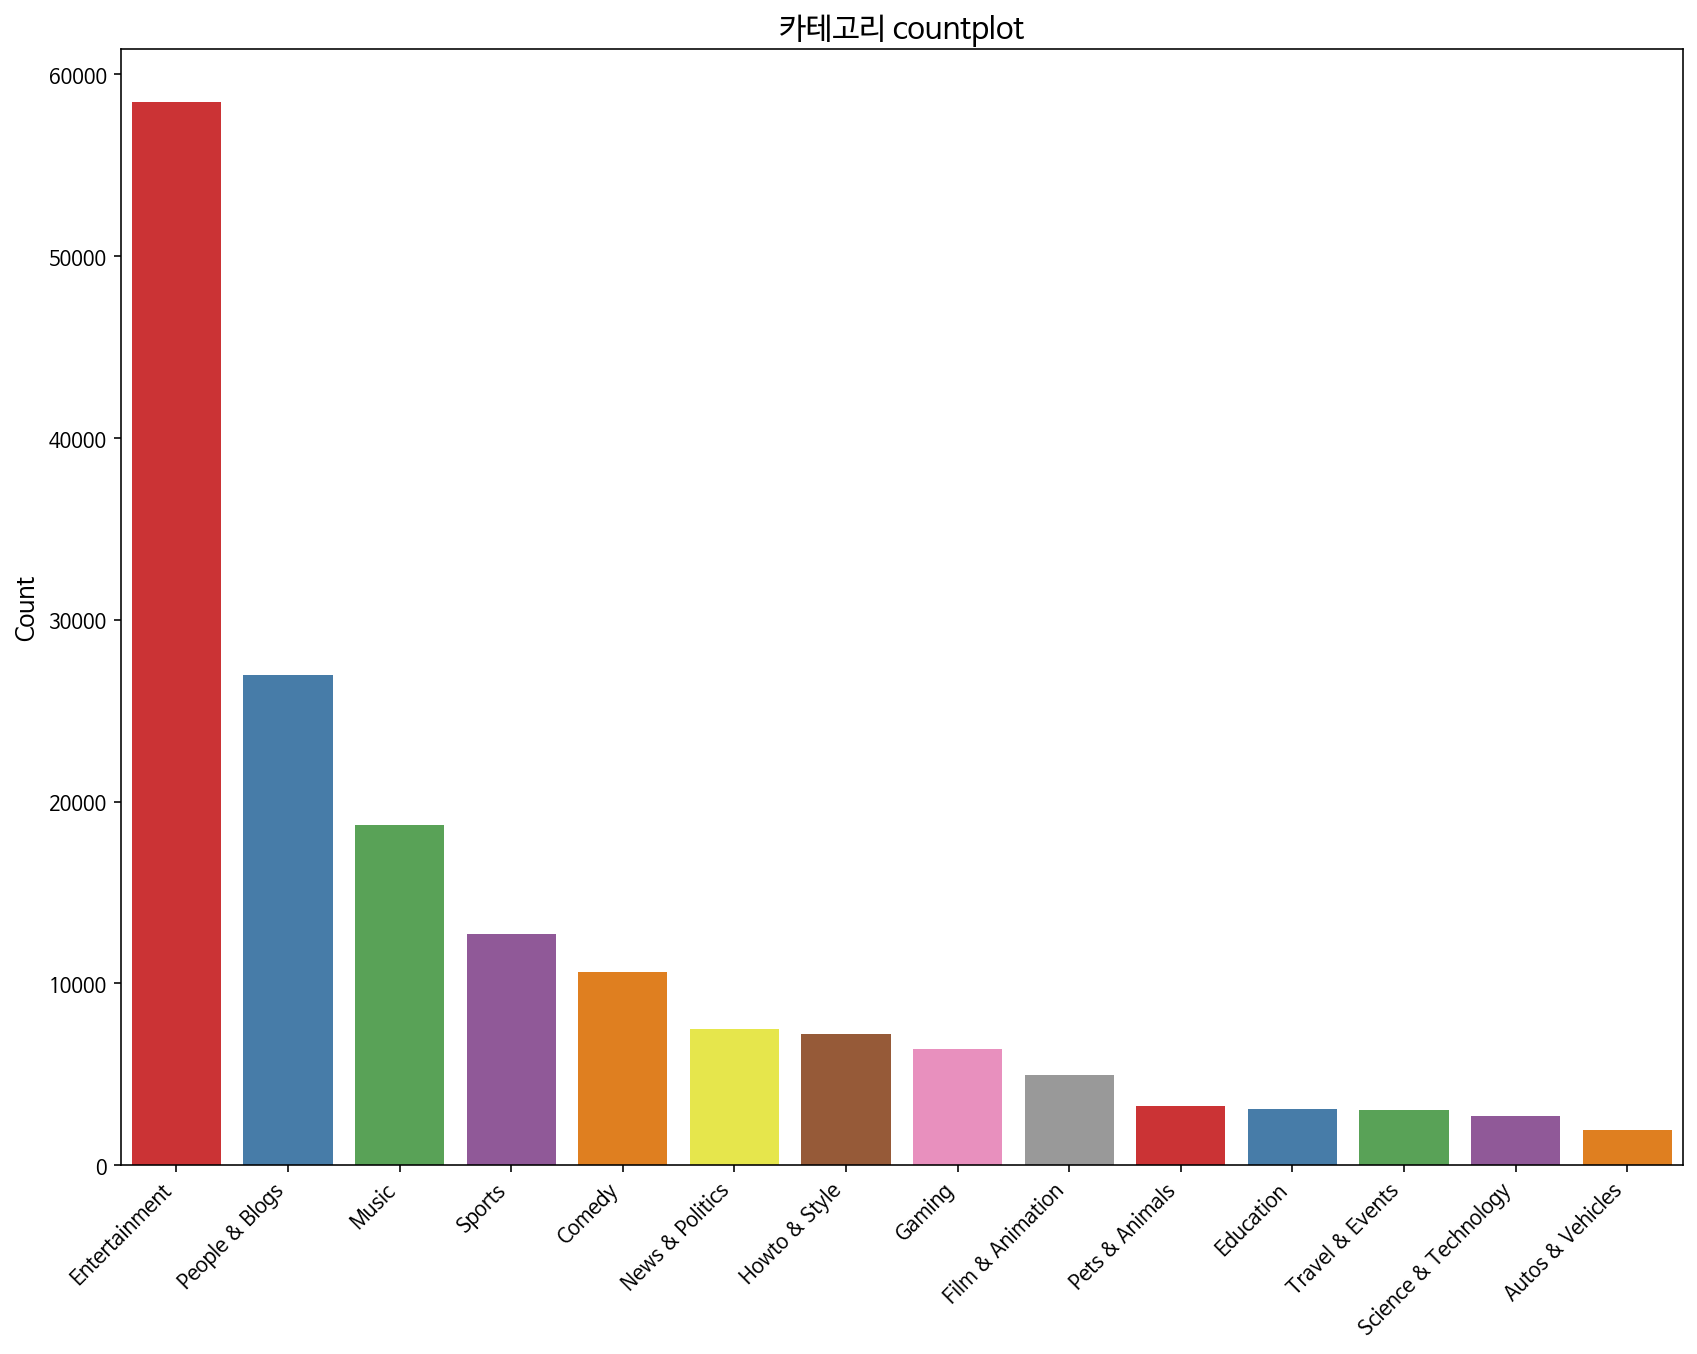

In [119]:
plt.figure(figsize = (14,10))
g = sns.countplot('category', data = df, palette="Set1", order = df['category'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("카테고리 countplot", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

**조회수, 좋아요, 싫어요와 댓글수가 서로 연관성이 있는가?**

In [120]:
columns_of_interest = ['view_count', 'likes', 'dislikes','comment_count']
corr_matrix = df[columns_of_interest].corr()
corr_matrix

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.875109,0.526336,0.780969
likes,0.875109,1.000000,0.563081,0.825373
dislikes,0.526336,0.563081,1.000000,0.585487
comment_count,0.780969,0.825373,0.585487,1.000000


**이걸로 아래에 긍정적 상관관계가 정리됩니다.**

**1. 조회수와 좋아요**

**2. 좋아요와 댓글 수**

**3. 싫어요와 댓글 수**





- **상관관계에 대한 heatmap 시각화**

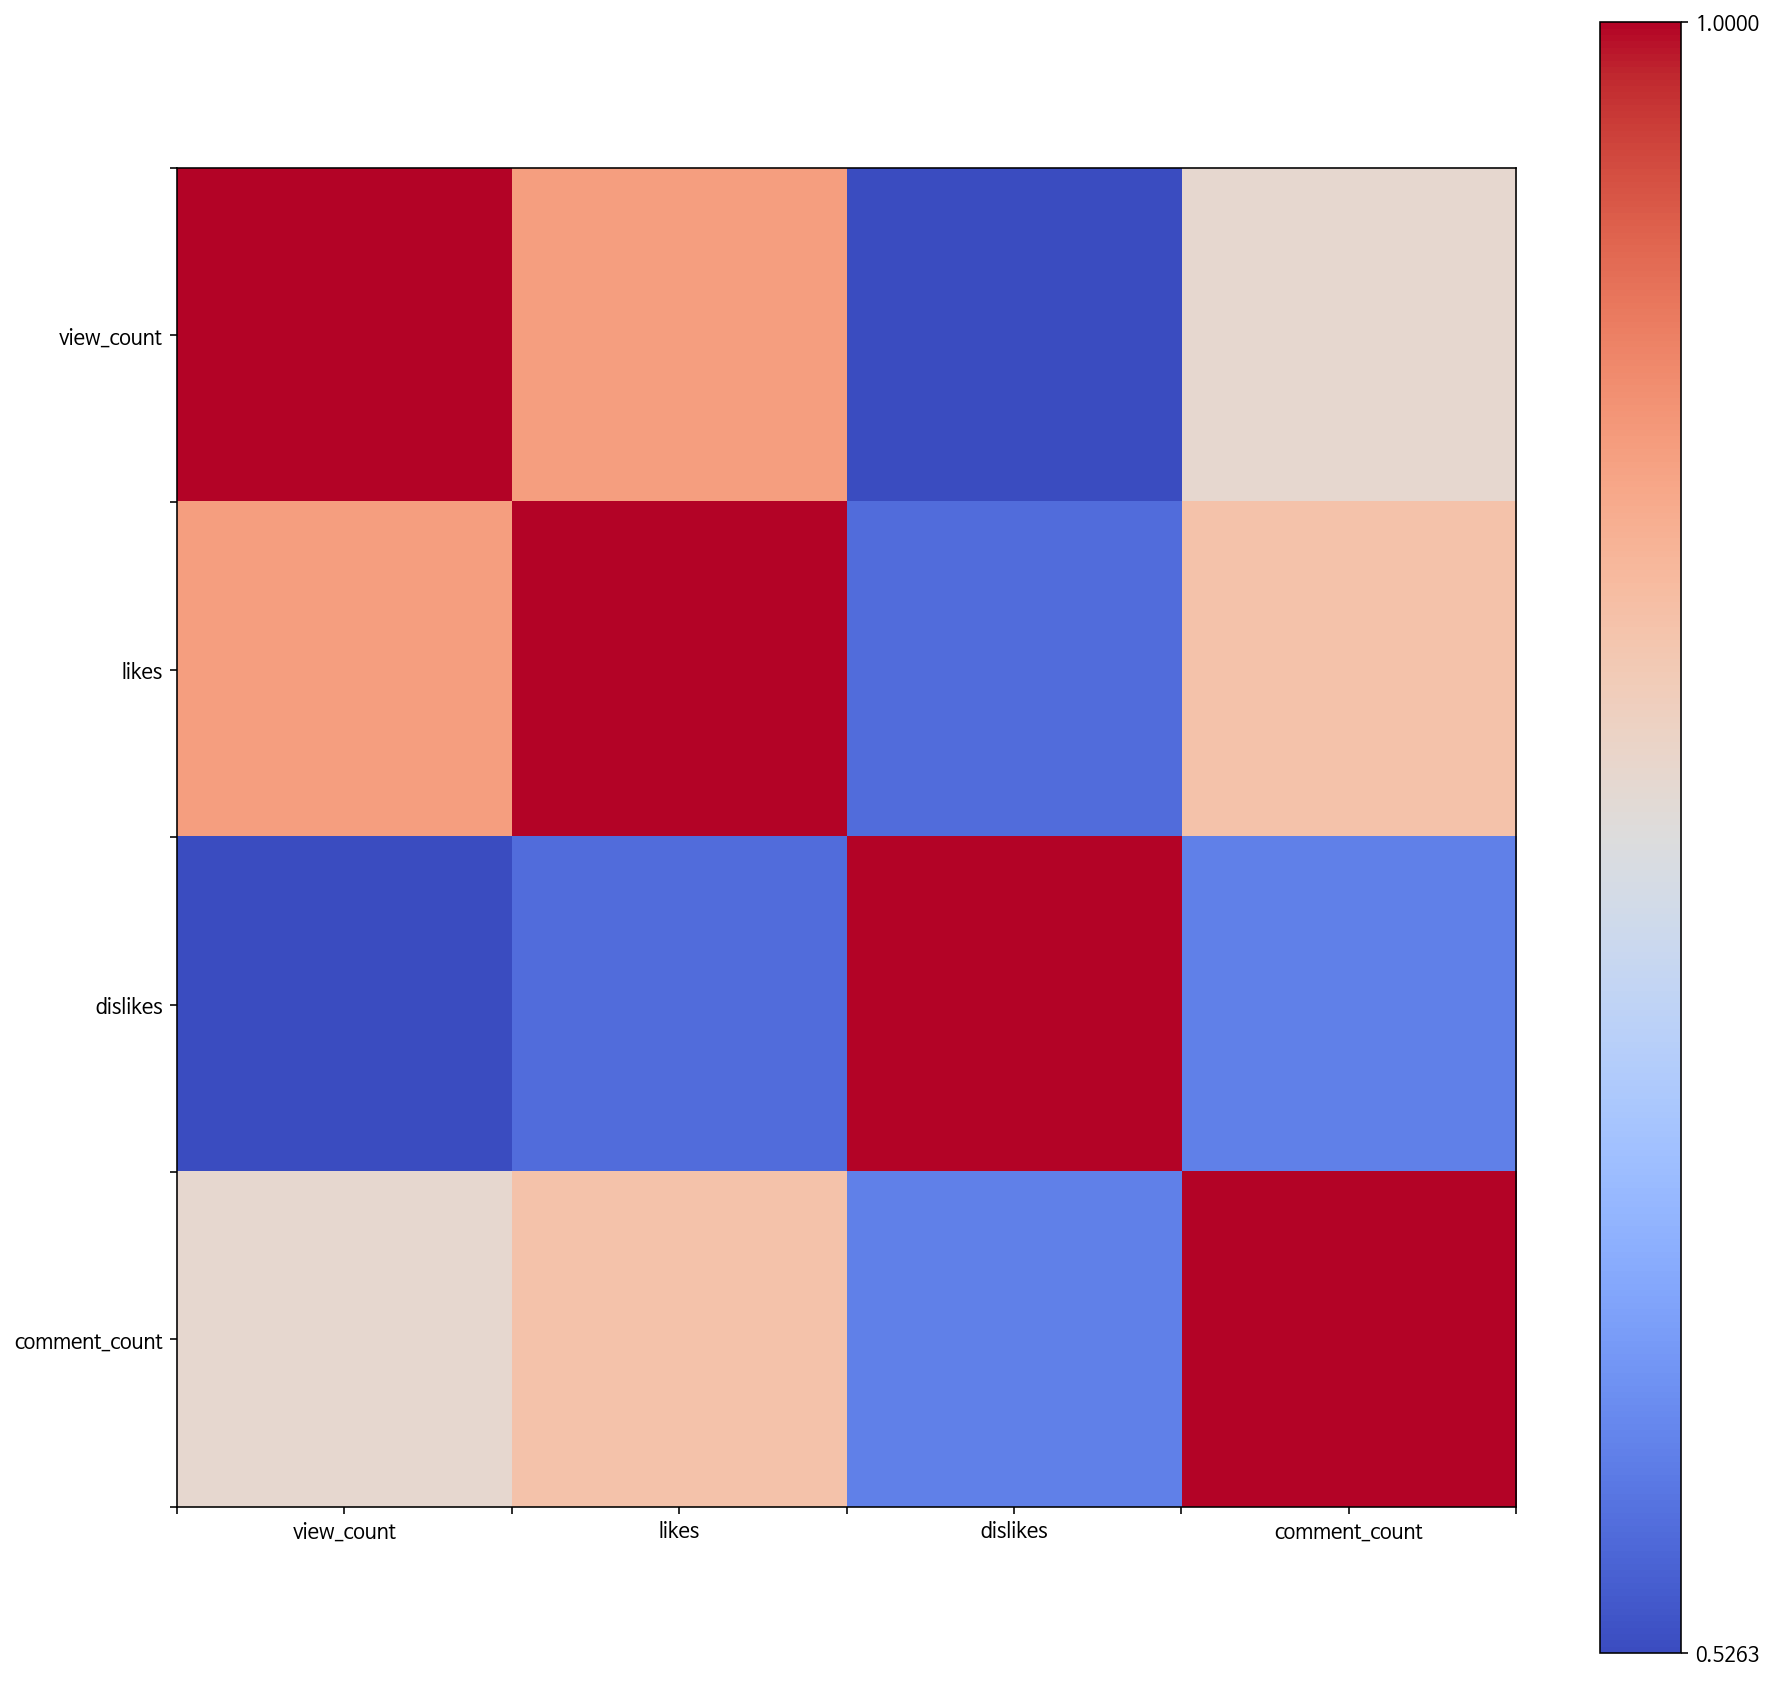

In [121]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)
# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])
# making the labels
labels = ['']
for column in columns_of_interest:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)
plt.show()

In [125]:
df1 = pd.read_csv("/content/KR_youtube_trending_data.csv")

----------------------------------------------------------------

- **데이터들에 대한 분포도**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

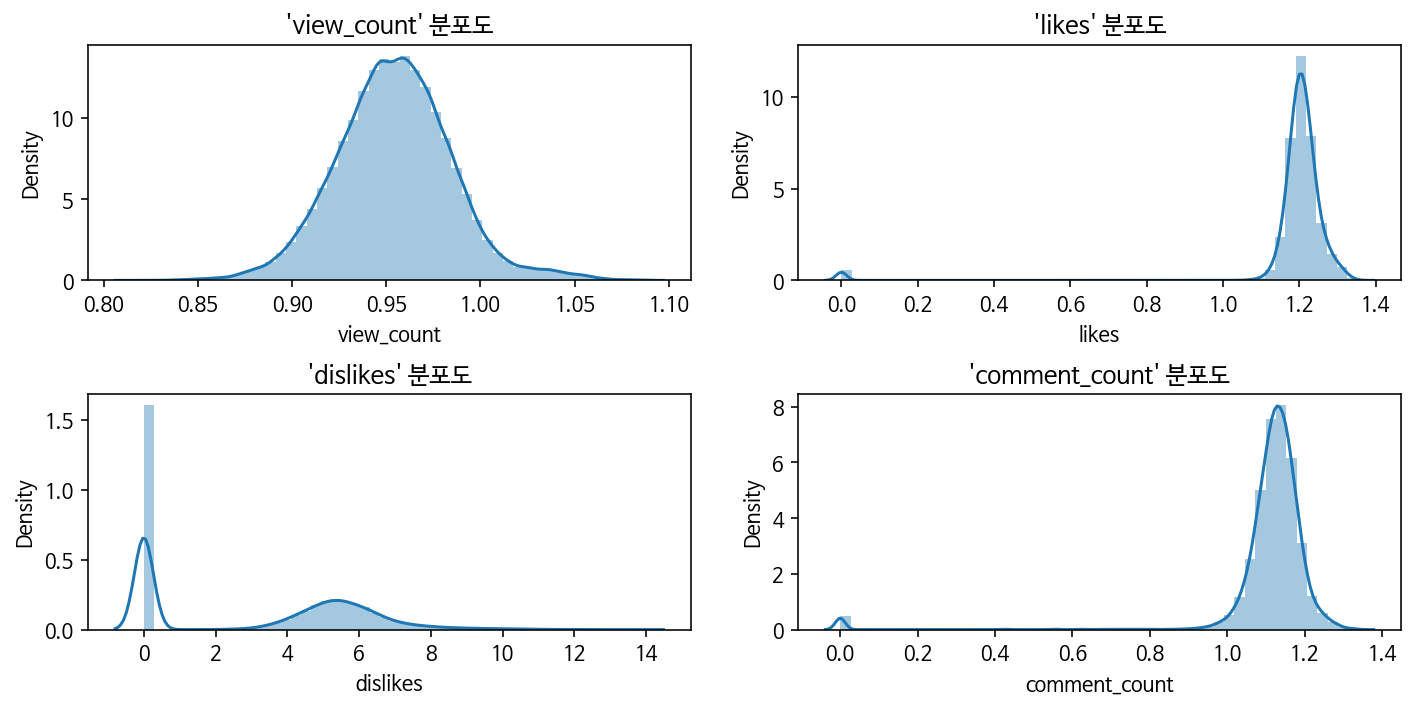

In [129]:
labels = ['view_count', 'likes', 'dislikes', 'comment_count']

df1['view_count'] = np.log(df1['view_count'])
df1['likes'] = np.log(df1['likes'] + 1)
df1['dislikes'] = np.log(df1['dislikes'] + 1)
df1['comment_count'] = np.log(df1['comment_count'] + 1)


fig, plots = plt.subplots(2, 2, figsize = (10,5))
plots = plots.flatten()
log_labels = ['view_count', 'likes', 'dislikes', 'comment_count']

for i in range(len(labels)):
    plots[i] = sns.distplot(df1[log_labels[i]], ax = plots[i])
    plots[i].set_title(" '{}' 분포도 ".format(labels[i]))
    
plt.tight_layout()